In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import keras
import cv2
import imageio
import os
from tqdm import tqdm
import gc
import random
import warnings
warnings.filterwarnings("ignore")
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D


2023-12-05 19:33:49.663905: I external/local_tsl/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2023-12-05 19:33:49.707041: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2023-12-05 19:33:49.707069: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2023-12-05 19:33:49.708317: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-12-05 19:33:49.714939: I external/local_tsl/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2023-12-05 19:33:49.715538: I tensorflow/core/platform/cpu_feature_guard.cc:1

In [2]:

datapath = 'dataset'


In [3]:
directories = []
for directory in os.listdir(datapath):
    directories.append(directory)
print('Classes Present : ',list(directories))


Classes Present :  ['cervix_koc', 'cervix_sfi', 'oral_normal', 'all_benign', 'oral_scc', 'lung_scc', 'lymph_cll', 'brain_tumor', 'lung_bnt', 'cervix_mep', 'cervix_pab', 'brain_glioma', 'lung_aca', 'kidney_tumor', 'colon_aca', 'brain_menin', 'lymph_mcl', 'breast_malignant', 'cervix_dyk', 'breast_benign', 'kidney_normal', 'lymph_fl', 'all_early', 'colon_bnt', 'all_pro', 'all_pre']


In [4]:
all_benign_files=[]
all_early_files=[]
all_pre_files=[]
all_pro_files=[]
brain_glioma_files=[]
brain_menin_files=[]
brain_tumor_files=[]
breast_benign_files=[]
breast_malignant_files=[]
cervix_dyk_files=[]
cervix_koc_files=[]
cervix_mep_files=[]
cervix_pab_files=[]
cervix_sfi_files=[]
colon_aca_files=[]
colon_bnt_files=[]
kidney_normal_files=[]
kidney_tumor_files=[]
lung_aca_files=[]
lung_bnt_files=[]
lung_scc_files=[]
lymph_cll_files=[]
lymph_fl_files=[]
lymph_mcl_files=[]
oral_normal_files=[]
oral_scc_files=[]
for directory in directories:
    for files in os.listdir(os.path.join(datapath,directory)):
        if directory == 'all_benign':
            all_benign_files.append(os.path.join(datapath,'all_benign',files))
        elif directory == 'all_early':
            all_early_files.append(os.path.join(datapath,'all_early',files))
        elif directory == 'all_pre':
            all_pre_files.append(os.path.join(datapath,'all_pre',files))
        elif directory == 'all_pro':
            all_pro_files.append(os.path.join(datapath,'all_pro',files))
        elif directory == 'brain_glioma':
            brain_glioma_files.append(os.path.join(datapath,'brain_glioma',files))
        elif directory == 'brain_menin':
            brain_menin_files.append(os.path.join(datapath,'brain_menin',files))
        elif directory == 'brain_tumor':
            brain_tumor_files.append(os.path.join(datapath,'brain_tumor',files))
        elif directory == 'breast_benign':
            breast_benign_files.append(os.path.join(datapath,'breast_benign',files))
        elif directory == 'breast_malignant':
            breast_malignant_files.append(os.path.join(datapath,'breast_malignant',files))
        elif directory == 'cervix_dyk':
            cervix_dyk_files.append(os.path.join(datapath,'cervix_dyk',files))
        elif directory == 'cervix_koc':
            cervix_koc_files.append(os.path.join(datapath,'cervix_koc',files))
        elif directory == 'cervix_mep':
            cervix_mep_files.append(os.path.join(datapath,'cervix_mep',files))
        elif directory == 'cervix_pab':
            cervix_pab_files.append(os.path.join(datapath,'cervix_pab',files))
        elif directory == 'cervix_sfi':
            cervix_sfi_files.append(os.path.join(datapath,'cervix_sfi',files))
        elif directory == 'colon_aca':
            colon_aca_files.append(os.path.join(datapath,'colon_aca',files))
        elif directory == 'colon_bnt':
            colon_bnt_files.append(os.path.join(datapath,'colon_bnt',files))
        elif directory == 'kidney_normal':
            kidney_normal_files.append(os.path.join(datapath,'kidney_normal',files))
        elif directory == 'kidney_tumor':
            kidney_tumor_files.append(os.path.join(datapath,'kidney_tumor',files))
        elif directory == 'lung_aca':
            lung_aca_files.append(os.path.join(datapath,'lung_aca',files))
        elif directory == 'lung_bnt':
            lung_bnt_files.append(os.path.join(datapath,'lung_bnt',files))
        elif directory == 'lung_scc':
            lung_scc_files.append(os.path.join(datapath,'lung_scc',files))
        elif directory == 'lymph_cll':
            lymph_cll_files.append(os.path.join(datapath,'lymph_cll',files))
        elif directory == 'lymph_fl':
            lymph_fl_files.append(os.path.join(datapath,'lymph_fl',files))
        elif directory == 'lymph_mcl':
            lymph_mcl_files.append(os.path.join(datapath,'lymph_mcl',files))
        elif directory == 'oral_normal':
            oral_normal_files.append(os.path.join(datapath,'oral_normal',files))
        elif directory == 'oral_scc':
            oral_scc_files.append(os.path.join(datapath,'oral_scc',files))       


In [5]:
print('Total all_benign :', len( all_benign_files))
print('Total all_early :', len( all_early_files))
print('Total all_pre :', len( all_pre_files))
print('Total all_pro :', len( all_pro_files))
print('Total brain_glioma :', len( brain_glioma_files))
print('Total brain_menin :', len( brain_menin_files))
print('Total brain_tumor :', len( brain_tumor_files))
print('Total breast_benign :', len( breast_benign_files))
print('Total breast_malignant :', len( breast_malignant_files))
print('Total cervix_dyk :', len( cervix_dyk_files))
print('Total cervix_koc :', len( cervix_koc_files))
print('Total cervix_mep :', len( cervix_mep_files))
print('Total cervix_pab :', len( cervix_pab_files))
print('Total cervix_sfi :', len( cervix_sfi_files))
print('Total colon_aca :', len( colon_aca_files))
print('Total colon_bnt :', len( colon_bnt_files))
print('Total kidney_normal :', len( kidney_normal_files))
print('Total kidney_tumor :', len( kidney_tumor_files))
print('Total lung_aca :', len( lung_aca_files))
print('Total lung_bnt :', len( lung_bnt_files))
print('Total lung_scc :', len( lung_scc_files))
print('Total lymph_cll :', len( lymph_cll_files))
print('Total lymph_fl :', len( lymph_fl_files))
print('Total lymph_mcl :', len( lymph_mcl_files))
print('Total oral_normal :', len( oral_normal_files))
print('Total oral_scc :', len( oral_scc_files))

Total all_benign : 5000
Total all_early : 5000
Total all_pre : 5000
Total all_pro : 5000
Total brain_glioma : 5000
Total brain_menin : 5000
Total brain_tumor : 5000
Total breast_benign : 5000
Total breast_malignant : 5000
Total cervix_dyk : 5000
Total cervix_koc : 5000
Total cervix_mep : 5000
Total cervix_pab : 5000
Total cervix_sfi : 5000
Total colon_aca : 5000
Total colon_bnt : 5000
Total kidney_normal : 5000
Total kidney_tumor : 5000
Total lung_aca : 5000
Total lung_bnt : 5000
Total lung_scc : 5000
Total lymph_cll : 5000
Total lymph_fl : 5000
Total lymph_mcl : 5000
Total oral_normal : 5001
Total oral_scc : 5001


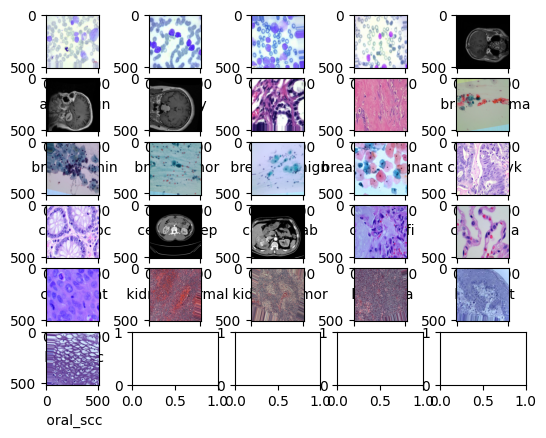

In [6]:
random_num=random.randint(0,len(all_pre_files))
all_benign_pic= all_benign_files[random_num]
all_early_pic= all_early_files[random_num]
all_pre_pic= all_pre_files[random_num]
all_pro_pic= all_pro_files[random_num]
brain_glioma_pic= brain_glioma_files[random_num]
brain_menin_pic= brain_menin_files[random_num]
brain_tumor_pic= brain_tumor_files[random_num]
breast_benign_pic= breast_benign_files[random_num]
breast_malignant_pic= breast_malignant_files[random_num]
cervix_dyk_pic= cervix_dyk_files[random_num]
cervix_koc_pic= cervix_koc_files[random_num]
cervix_mep_pic= cervix_mep_files[random_num]
cervix_pab_pic= cervix_pab_files[random_num]
cervix_sfi_pic= cervix_sfi_files[random_num]
colon_aca_pic= colon_aca_files[random_num]
colon_bnt_pic= colon_bnt_files[random_num]
kidney_normal_pic= kidney_normal_files[random_num]
kidney_tumor_pic= kidney_tumor_files[random_num]
lung_aca_pic= lung_aca_files[random_num]
lung_bnt_pic= lung_bnt_files[random_num]
lung_scc_pic= lung_scc_files[random_num]
lymph_cll_pic= lymph_cll_files[random_num]
lymph_fl_pic= lymph_fl_files[random_num]
lymph_mcl_pic= lymph_mcl_files[random_num]
oral_normal_pic= oral_normal_files[random_num]
oral_scc_pic= oral_scc_files[random_num]
all_benign_data=imageio.imread( all_benign_pic)
all_early_data=imageio.imread( all_early_pic)
all_pre_data=imageio.imread( all_pre_pic)
all_pro_data=imageio.imread( all_pro_pic)
brain_glioma_data=imageio.imread( brain_glioma_pic)
brain_menin_data=imageio.imread( brain_menin_pic)
brain_tumor_data=imageio.imread( brain_tumor_pic)
breast_benign_data=imageio.imread( breast_benign_pic)
breast_malignant_data=imageio.imread( breast_malignant_pic)
cervix_dyk_data=imageio.imread( cervix_dyk_pic)
cervix_koc_data=imageio.imread( cervix_koc_pic)
cervix_mep_data=imageio.imread( cervix_mep_pic)
cervix_pab_data=imageio.imread( cervix_pab_pic)
cervix_sfi_data=imageio.imread( cervix_sfi_pic)
colon_aca_data=imageio.imread( colon_aca_pic)
colon_bnt_data=imageio.imread( colon_bnt_pic)
kidney_normal_data=imageio.imread( kidney_normal_pic)
kidney_tumor_data=imageio.imread( kidney_tumor_pic)
lung_aca_data=imageio.imread( lung_aca_pic)
lung_bnt_data=imageio.imread( lung_bnt_pic)
lung_scc_data=imageio.imread( lung_scc_pic)
lymph_cll_data=imageio.imread( lymph_cll_pic)
lymph_fl_data=imageio.imread( lymph_fl_pic)
lymph_mcl_data=imageio.imread( lymph_mcl_pic)
oral_normal_data=imageio.imread( oral_normal_pic)
oral_scc_data=imageio.imread( oral_scc_pic)

fig,axs=plt.subplots(6,5)
axs[0,0].imshow(all_benign_data)
axs[0,1].imshow(all_early_data)
axs[0,2].imshow(all_pre_data)
axs[0,3].imshow(all_pro_data)
axs[0,4].imshow(brain_glioma_data)
axs[1,0].imshow(brain_menin_data)
axs[1,1].imshow(brain_tumor_data)
axs[1,2].imshow(breast_benign_data)
axs[1,3].imshow(breast_malignant_data)
axs[1,4].imshow(cervix_dyk_data)
axs[2,0].imshow(cervix_koc_data)
axs[2,1].imshow(cervix_mep_data)
axs[2,2].imshow(cervix_pab_data)
axs[2,3].imshow(cervix_sfi_data)
axs[2,4].imshow(colon_aca_data)
axs[3,0].imshow(colon_bnt_data)
axs[3,1].imshow(kidney_normal_data)
axs[3,2].imshow(kidney_tumor_data)
axs[3,3].imshow(lung_aca_data)
axs[3,4].imshow(lung_bnt_data)
axs[4,0].imshow(lung_scc_data)
axs[4,1].imshow(lymph_cll_data)
axs[4,2].imshow(lymph_fl_data)
axs[4,3].imshow(lymph_mcl_data)
axs[4,4].imshow(oral_normal_data)
axs[5,0].imshow(oral_scc_data)
axs[0,0].set_xlabel(' all_benign')
axs[0,1].set_xlabel(' all_early')
axs[0,2].set_xlabel(' all_pre')
axs[0,3].set_xlabel(' all_pro')
axs[0,4].set_xlabel(' brain_glioma')
axs[1,0].set_xlabel(' brain_menin')
axs[1,1].set_xlabel(' brain_tumor')
axs[1,2].set_xlabel(' breast_benign')
axs[1,3].set_xlabel(' breast_malignant')
axs[1,4].set_xlabel(' cervix_dyk')
axs[2,0].set_xlabel(' cervix_koc')
axs[2,1].set_xlabel(' cervix_mep')
axs[2,2].set_xlabel(' cervix_pab')
axs[2,3].set_xlabel(' cervix_sfi')
axs[2,4].set_xlabel(' colon_aca')
axs[3,0].set_xlabel(' colon_bnt')
axs[3,1].set_xlabel(' kidney_normal')
axs[3,2].set_xlabel(' kidney_tumor')
axs[3,3].set_xlabel(' lung_aca')
axs[3,4].set_xlabel(' lung_bnt')
axs[4,0].set_xlabel(' lung_scc')
axs[4,1].set_xlabel(' lymph_cll')
axs[4,2].set_xlabel(' lymph_fl')
axs[4,3].set_xlabel(' lymph_mcl')
axs[4,4].set_xlabel(' oral_normal')
axs[5,0].set_xlabel(' oral_scc')

plt.savefig('Images.png')
plt.show()

In [7]:

gc.collect()


75

In [8]:

# generator = ImageDataGenerator(
#     horizontal_flip=True,
#     vertical_flip=True,
#     validation_split=0.2,
#     # shuffle=True
# )


In [9]:
# train_ds = generator.flow_from_directory(
#     'mcc2',
#     target_size=(224, 224),
#     batch_size=32,
#     class_mode='categorical',
#     subset='training',
#     shuffle=True
# )
# val_ds = generator.flow_from_directory(
#     'mcc2',
#     target_size=(224, 224),
#     batch_size=32,
#     class_mode='categorical',
#     subset='validation',
#     shuffle=True
# )


In [10]:
train_ds, val_ds = tf.keras.utils.image_dataset_from_directory(
    'dataset',
    labels='inferred',
    label_mode='categorical',
    batch_size=32,
    image_size=(224, 224),
    shuffle=True,
    seed=42,
    validation_split=0.2,
    subset='both',# find the index of the maximum element in an array

)
def find_max(arr):
    maxi = max(arr)
    for i in range(len(arr)):
        if arr[i] == maxix:
            return i

Found 130002 files belonging to 26 classes.
Using 104002 files for training.
Using 26000 files for validation.


2023-12-05 19:34:10.507933: W tensorflow/core/common_runtime/gpu/gpu_device.cc:2256] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...


In [11]:
train_ds.class_names

['all_benign',
 'all_early',
 'all_pre',
 'all_pro',
 'brain_glioma',
 'brain_menin',
 'brain_tumor',
 'breast_benign',
 'breast_malignant',
 'cervix_dyk',
 'cervix_koc',
 'cervix_mep',
 'cervix_pab',
 'cervix_sfi',
 'colon_aca',
 'colon_bnt',
 'kidney_normal',
 'kidney_tumor',
 'lung_aca',
 'lung_bnt',
 'lung_scc',
 'lymph_cll',
 'lymph_fl',
 'lymph_mcl',
 'oral_normal',
 'oral_scc']

In [12]:

checkpoint_filepath = 'checkpoint_small'
callback = [
    tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=3),
    tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.2,patience=5, min_lr=0.001),
    tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_filepath,save_weights_only=True,monitor='val_accuracy',mode='max',save_best_only=True)
]


In [13]:
base_model_resnet = ResNet50(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
for layer in base_model_resnet.layers:
    layer.trainable = False
x = base_model_resnet.output
x = GlobalAveragePooling2D()(x)
x = Dense(256, activation='relu')(x)
predictions = Dense(26   , activation='softmax')(x)
# predictions = Dense(5    )(x)
model = Model(inputs=base_model_resnet.input, outputs=predictions)
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


In [14]:
history = model.fit(train_ds,verbose = 1,epochs = 5,batch_size = 32,validation_data = val_ds,callbacks = callback)

Epoch 1/5


3251/3251 [==============================] - 2321s 713ms/step - loss: 0.2257 - accuracy: 0.9138 - val_loss: 0.1658 - val_accuracy: 0.9375 - lr: 0.0010
Epoch 2/5
3251/3251 [==============================] - 2288s 704ms/step - loss: 0.1022 - accuracy: 0.9611 - val_loss: 0.0812 - val_accuracy: 0.9682 - lr: 0.0010
Epoch 3/5
3251/3251 [==============================] - 2309s 710ms/step - loss: 0.0675 - accuracy: 0.9751 - val_loss: 0.0714 - val_accuracy: 0.9740 - lr: 0.0010
Epoch 4/5
3251/3251 [==============================] - 2368s 728ms/step - loss: 0.0541 - accuracy: 0.9806 - val_loss: 0.0774 - val_accuracy: 0.9750 - lr: 0.0010
Epoch 5/5
3251/3251 [==============================] - 2395s 737ms/step - loss: 0.0417 - accuracy: 0.9850 - val_loss: 0.0459 - val_accuracy: 0.9845 - lr: 0.0010


In [15]:
model.save('t3_5_epoch.h5')

In [16]:
predict = model.predict(val_ds)
predict

813/813 [==============================] - 456s 560ms/step


array([[2.26730904e-19, 6.32442899e-18, 1.05933676e-24, ...,
        2.88640332e-18, 2.03514219e-11, 3.32086328e-13],
       [1.72212571e-16, 9.99999940e-01, 2.95987437e-13, ...,
        1.16805829e-21, 6.23806546e-21, 3.46945075e-21],
       [2.20498904e-07, 5.62637671e-14, 1.03352738e-13, ...,
        7.20889104e-12, 2.01787728e-07, 2.25151695e-07],
       ...,
       [9.99944031e-01, 2.69762368e-05, 2.70058455e-12, ...,
        2.04441867e-12, 6.60315010e-13, 2.71920351e-11],
       [3.87832670e-15, 1.10827161e-16, 2.55716663e-15, ...,
        1.01534887e-22, 1.06335689e-17, 1.79576178e-24],
       [5.94728666e-09, 8.02652389e-12, 4.20585848e-13, ...,
        4.58088733e-14, 9.99856710e-01, 4.93443040e-05]], dtype=float32)

In [17]:
from tensorflow.keras.models import load_model

In [18]:
# find the index of the maximum element in an array
def find_max(arr):
    maxi = max(arr)
    for i in range(len(arr)):
        if arr[i] == maxi:
            return i

In [20]:
# predict the class from an imput image using our trained model
def predict_image_class(model, img, show = True):
    img = cv2.imread(img)
    img = cv2.resize(img,(224,224))
    img = np.reshape(img,[1,224,224,3])
    classes = model.predict(img)
    print(classes)
    # maxi = max(classes)
    # # find the class with maximum probability and print it
    # l = []
    # for i in range(5):
    #     if classes[0][i] == maxi:
    #         max_ind = i
    #         break
    #     print(train_ds.class_names[max_ind])

    max_ind = find_max(classes[0])
    print(train_ds.class_names[max_ind])
    if show:
        plt.imshow(img[0])
        plt.show()

model = load_model('mcc_latest.h5')
predict_image_class(model,'mcc2/oral_normal/oral_normal_0035.jpg')

[ WARN:0@12449.005] global loadsave.cpp:248 findDecoder imread_('mcc2/oral_normal/oral_normal_0035.jpg'): can't open/read file: check file path/integrity


error: OpenCV(4.8.1) /io/opencv/modules/imgproc/src/resize.cpp:4062: error: (-215:Assertion failed) !ssize.empty() in function 'resize'


In [ ]:
train_ds.class_names

['brain_glioma', 'brain_menin', 'brain_tumor', 'oral_normal', 'oral_scc']

In [ ]:
pdf=train_ds.class_names
